# Introduction to Grid Universe

## **Overview**
Grid Universe is a highly flexible grid-based world environment, which allows you to implement an agent to interact with the environment and fulfill different objectives.

Please refer to `README.md` for setting up the project.

Let's have a quick introduction to the Grid Universe environment.

### **Level 0 - Basic Movements**
> Let us start with an empty lot! Here, the objective is to reach the exit. Nothing is blocking you. 

We will maintain a table of all learned mechanics for your convenience.
| Level | Focus | New Mechanic |
| --- | --- | --- |
| L0 | Basic movement | Exit |

In [421]:
from grid_universe.examples.maze import generate
from grid_universe.renderer.texture import TextureRenderer
from grid_universe.levels.grid import Level
from grid_universe.state import State
from grid_universe.levels.factories import create_floor, create_agent, create_exit
from grid_universe.levels.convert import to_state
from grid_universe.moves import *
from grid_universe.objectives import *

level = Level(
    width=5,
    height=5,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

level.add((1, 2), create_agent(health=5))
level.add((3, 2), create_exit())

# 3) Convert to runtime State (immutable)
state = to_state(level)

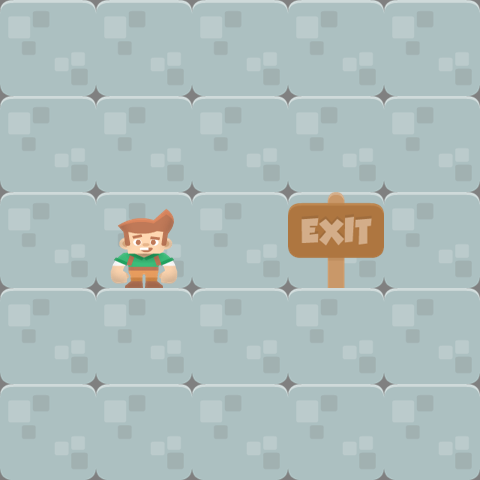

In [422]:
renderer = TextureRenderer(resolution=480)   # Use relative path to assets
img = renderer.render(state)                 # PIL.Image (RGBA)

# Display image
img

Let's try to move around the maze. There are seven actions that the agent can perform, but for this level, let's focus on actions related to movement.

In [423]:
agent_id = next(iter(state.agent.keys()))

Moving 1 tile up...


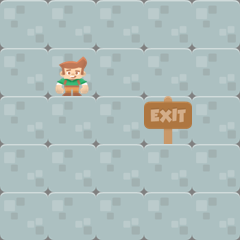

Moving 1 tile to the left...


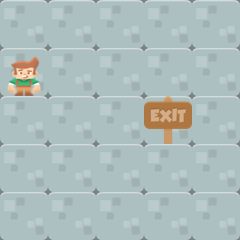

Moving 1 tile down...


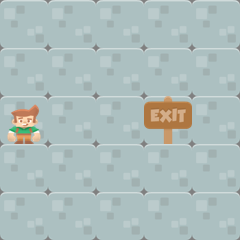

Moving 1 tile to the right...


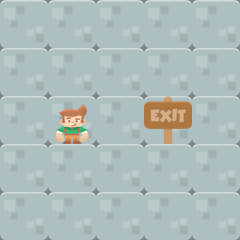

In [424]:
from grid_universe.actions import Action
from grid_universe.step import step
from IPython.display import display

desc = {
    Action.UP: "Moving 1 tile up...",
    Action.LEFT: "Moving 1 tile to the left...",
    Action.DOWN: "Moving 1 tile down...",
    Action.RIGHT: "Moving 1 tile to the right...",
}

renderer = TextureRenderer(resolution=240)

for a in [Action.UP, Action.LEFT, Action.DOWN, Action.RIGHT]:
    state = step(state, a, agent_id=agent_id)
    print(desc[a])
    display(renderer.render(state))

renderer = TextureRenderer(resolution=480)

Now, write the sequence of actions that allows you to reach the exit for this particular simple maze!

In [425]:
from typing import List

action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

if state.win:
    print("Congratulations! You have exited the maze!")
else:
    print("You are stuck here, forever!!!")

You are stuck here, forever!!!


We have just learnt how to navigate the grid world, but to actually exit it, the agent has to know how the grid looks like. Fortunately, Grid Universe is fully observable. Let us learn the `Level` and the `State` representation of Grid Universe.

The `Level` representation is a mutable, grid-centric state representation, that is, each Level maintains a 2-dimensional grid, and each cell in the grid holds a list of entities. Everything is an entity in Grid Universe, including floors, walls, the agent and the exit. This representation is great when the grid is dense. Please refer to the `grid.py` file [(here)](grid_universe/levels/grid.py) for more details. 

> Note that the grid coordinates are in Cartesian (x, y), and not (r, c). That is, for a cell in row 1, column 2, it means y = 1, x = 2 and you access the cell: `level.grid[2][1]`

The `State` representation, on the other hand, is immutable, and stores the grid as a bunch of components. Instead of knowing what each cell contains, you will know which entity is in which cell. This representation is great when the grid is sparse. Please refer to the `state.py` file [(here)](grid_universe/state.py) for more details.

To convert a `Level` to a `State`, you can do
```python
# Assume some pre-defined state
from grid_universe.levels.convert import to_state
state = to_state(level)
```

Now, let's play around with both `Level` and `State` representations. We use the same level and state as the empty lot above. Because they have been defined, you can just call `level` and `state` directly in your functions.

In [426]:
from typing import Tuple

def get_agent_position_from_level_repr() -> Tuple[int, int]:
    # try to get your (the agent's) position from the Level representation by traversing the grid
    pass

def get_agent_position_from_state_repr() -> Tuple[int, int]:
    # Now, try to get your (the agent's) position from the State representation by reading the position of the agent
    # Hint: `agent_id` has already been defined
    pass

# Now, do the same thing for exit
def get_exit_position_from_level_repr() -> Tuple[int, int]:
    pass    
                
def get_exit_position_from_state_repr() -> Tuple[int, int]:
    pass

In [427]:
# Test
assert get_agent_position_from_level_repr() == (1, 2)
assert get_agent_position_from_state_repr() == (1, 2)

assert get_exit_position_from_level_repr() == (3, 2)
assert get_exit_position_from_state_repr() == (3, 2)

AssertionError: 

Again, as a small reminder, to transition between each state, use the `step` function. To check whether you have met the objective (here is to exit the maze), use `state.win`.

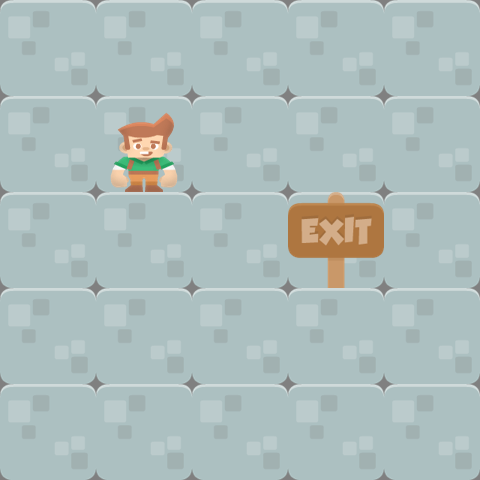

Haven't exited


In [428]:
next_state = step(state, Action.UP, agent_id) # Expect to move the agent up by 1 tile
display(renderer.render(next_state))
print("Exited" if next_state.win else "Haven't exited") # expect "Haven't exited"

Now, your agent has understood the basics of the maze! It's time to ramp up the difficulty. 

### **Level 1 - Maze Turns**
> Now, some walls sit between you and the goal. You cannot step on a cell occupied by a wall.

| Level | Focus | New Mechanic |
| --- | --- | --- |
| L0 | Basic movement | Exit |
| L1 | Maze turns | Blocking |

Because a wall is blocking, after getting the `EntitySpec` in `Level` representation, you can check if it is blocking using `entity.blocking`. It returns a `Blocking` object if the entity is blocking, `None` otherwise. This is applicable to every other entities such as `Exit` and everything else we are going to explore.

In `State` representation, you can enumerate all IDs of `Blocking` entities by `state.blocking.keys()`.

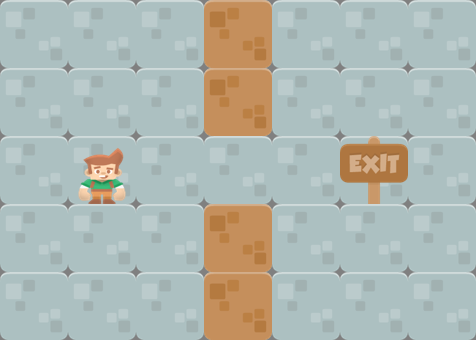

In [429]:
from grid_universe.levels.factories import create_wall

level = Level(
    width=7,
    height=5,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

level.add((1, 2), create_agent(health=5))
level.add((5, 2), create_exit())

level.add((3, 0), create_wall())
level.add((3, 1), create_wall())
level.add((3, 3), create_wall())
level.add((3, 4), create_wall())

# 3) Convert to runtime State (immutable)
state = to_state(level)
agent_id = next(iter(state.agent.keys()))
renderer.render(state)

Write the sequence of actions to solve this trivial maze.

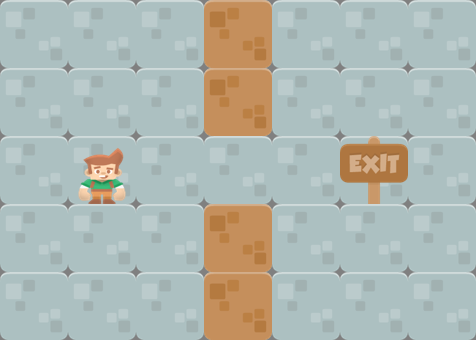

You are stuck here, forever!!!


In [430]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))

if state.win:
    print("Congratulations! You have exited the maze!")
else:
    print("You are stuck here, forever!!!")

Now, this non-trivial maze

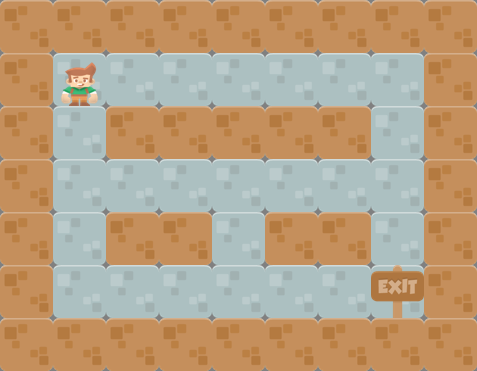

In [431]:
level = Level(
    width=9,
    height=7,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if y == 0 or y == level.height - 1 or x == 0 or x == level.width - 1:
            level.add((x, y), create_wall())

level.add((1, 1), create_agent(health=5))
level.add((7, 5), create_exit())

level.add((2, 2), create_wall())
level.add((3, 2), create_wall())
level.add((4, 2), create_wall())
level.add((5, 2), create_wall())
level.add((6, 2), create_wall())

level.add((2, 4), create_wall())
level.add((3, 4), create_wall())
level.add((5, 4), create_wall())
level.add((6, 4), create_wall())

# 3) Convert to runtime State (immutable)
state = to_state(level)
agent_id = next(iter(state.agent.keys()))
renderer.render(state)

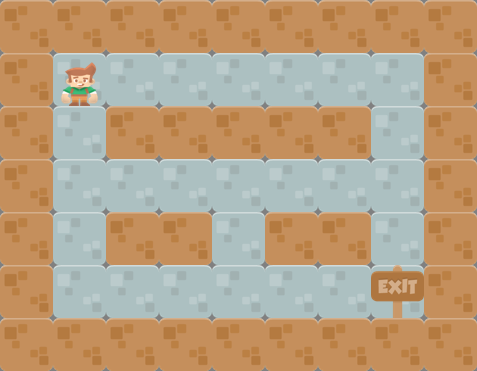

You are stuck here, forever!!!


In [432]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))

if state.win:
    print("Congratulations! You have exited the maze!")
else:
    print("You are stuck here, forever!!!")

### **Level 2 - Optional Coins**
> Welp, that's enough exploration. Let's think about the economy game.

Each action now incurs a uniform cost. Grid Universe does not enforce that you make it out of the grid with non-negative score, but we naturally want to maximise the score, that is, to minimise the cost. And the grid is benevolent enough to drop some coins. They are optional, but collecting coins helps you offset the cost of movement.

| Level | Focus | New Mechanic |
| --- | --- | --- |
| L0 | Basic movement | Exit |
| L1 | Maze turns | Blocking |
| L2 | Optional Coins | Collectible, Rewardable, Cost |

Let's introduce a new action: `Action.PICK_UP`

When this action is performed, you stay on the same tile and collect everything that is `Collectible` on that tile (here, a coin is `Collectible`). Because this is an `Action`, you cannot move and pick up collectibles on the same turn. 

A `Rewardable` will reward you with score. A `Rewardable` is not necessarily `Collectible`. Here, the coin is a `Rewardable`.

A `Cost`, on the other hand, will cost you some score. The floor is a `Cost`.

**Note that because at the end of every action, the agent stands on a floor tile, all actions incur some cost, even if wasted. That is, if you move in a direction blocked by a `Blocking` entity, or pick up on a tile without any `Collectible`, there is still cost simply because you waste 1 turn standing on a floor tile.**

However, if the action results in the agent fulfilling the objective, there is no cost.

Similar to `Blocking`, you can check the properties of an `EntitySpec` for `entity.rewardable`, `entity.collectible` and `entity.cost`. We will not mention this again in subsequent level introductions.

At any state, you can retrieve either `state.score` or `level.score` if you use `State` or `Level`. If you use your own state representation, take note:
- Any action has a cost of `a`. When you pick up a coin of score `c`, your score increases by `(c - a)`.

Let's try out the pick-up action and the cost mechanism here. Try not to waste any action.

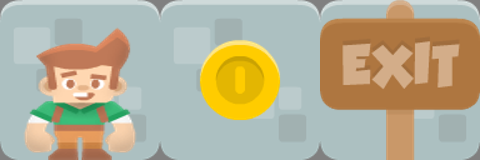

In [433]:
from grid_universe.levels.factories import create_coin

level = Level(
    width=3,
    height=1,
    move_fn=default_move_fn,
    objective_fn=exit_objective_fn,
    score=0
)


for y in range(level.height):
    for x in range(level.width):
        # When you perform any action, the cost is the cost of the tile that you stand on at the end of the action
        # If you move from tile A to tile B, the cost comes from tile B.
        # If you pick up an item on tile A, the cost comes from tile A.
        level.add((x, y), create_floor(cost_amount=1))

level.add((0, 0), create_agent())
level.add((1, 0), create_coin(reward=10)) # The coin rewards 10
level.add((2, 0), create_exit())          # The exit does not incur any cost

state = to_state(level)
agent_id = next(iter(state.agent.keys()))

display(renderer.render(state))

In [434]:
# Specify the list of actions that will bring you to the goal with minimal cost.
path: List[Action] = []

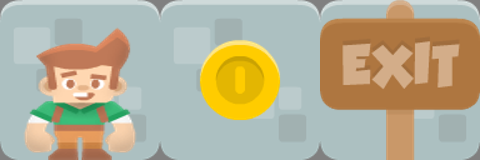

The agent has not reached the exit!


In [435]:
# Reset the state so that you only need to run this cell for testing
state = to_state(level)

agent_id = next(iter(state.agent.keys()))
for a in path:
    state = step(state, a, agent_id)
    print(state.score)

display(renderer.render(state))

if (not state.win):
    print("The agent has not reached the exit!")
elif (state.score > 8):
    print("The agent does not reach the exit with minimal cost")
else:
    print("Congratulations! The agent reaches the exit with the minimum cost.")

Now, let's solve this slightly more complicated maze.

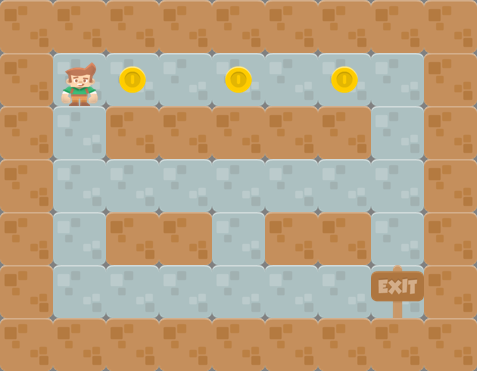

In [436]:
from grid_universe.levels.factories import create_coin

level = Level(
    width=9,
    height=7,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if y == 0 or y == level.height - 1 or x == 0 or x == level.width - 1:
            level.add((x, y), create_wall())

level.add((1, 1), create_agent(health=5))
level.add((7, 5), create_exit())

level.add((2, 2), create_wall())
level.add((3, 2), create_wall())
level.add((4, 2), create_wall())
level.add((5, 2), create_wall())
level.add((6, 2), create_wall())

level.add((2, 4), create_wall())
level.add((3, 4), create_wall())
level.add((5, 4), create_wall())
level.add((6, 4), create_wall())

level.add((2, 1), create_coin(reward=10))
level.add((4, 1), create_coin(reward=10))
level.add((6, 1), create_coin(reward=10))

# 3) Convert to runtime State (immutable)
state = to_state(level)
renderer.render(state)

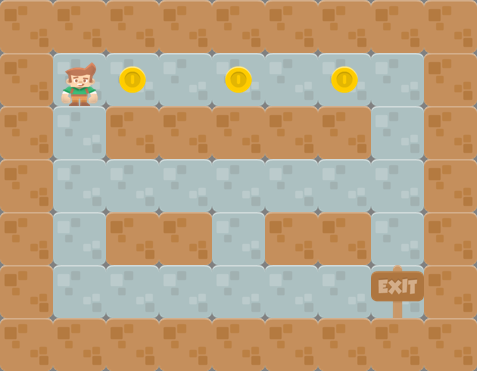

The agent has not reached the exit!


In [437]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

agent_id = next(iter(state.agent.keys()))
for a in action_sequence:
    state = step(state, a, agent_id)

display(renderer.render(state))

if (not state.win):
    print("The agent has not reached the exit!")
elif (state.score > 18):
    print("The agent does not reach the exit with minimal cost")
else:
    print("Congratulations! The agent reaches the exit with the minimum cost.")

### **Level 3, 4 - Required Core(s)**
> Objective changed! You need to pick up some cores.

Within the grid, there are cores, which are collectible items that must be collected. This introduces two new objectives:
- Collect all cores to win (no need to escape) (`collect_required_objective_fn`)
- Collect all cores **AND** escape the grid (`default_objective_fn`)

| Level | Focus | New Mechanic |
| --- | --- | --- |
| L0 | Basic movement | Exit |
| L1 | Maze turns | Blocking |
| L2 | Optional Coins | Collectible, Rewardable, Cost |
| L3 | One Required Core | Required |
| L4 | Two Required Cores | Required |

Because you have to pick up a core, a core is `Collectible`. At the same time, any mechanism that is required to clear the objective is `Required`. 

Note that each level introduces a mechanism, so we will not care about scores and focus on explaining mechanisms.

Let's try out our new mechanism:

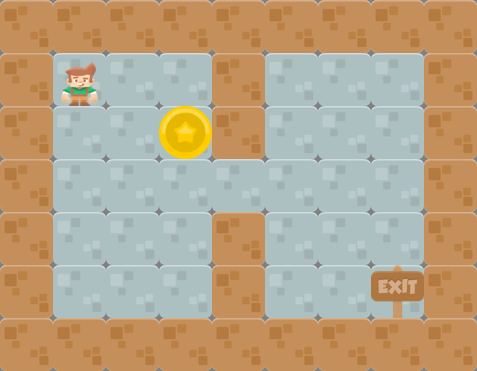

In [438]:
from grid_universe.levels.factories import create_core

level = Level(
    width=9,
    height=7,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=default_objective_fn,    # win when collecting all cores and standing on exit
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if y == 0 or y == level.height - 1 or x == 0 or x == level.width - 1:
            level.add((x, y), create_wall())

level.add((1, 1), create_agent(health=5))
level.add((7, 5), create_exit())

level.add((4, 1), create_wall())
level.add((4, 2), create_wall())
level.add((4, 4), create_wall())
level.add((4, 5), create_wall())

level.add((3, 2), create_core())

# 3) Convert to runtime State (immutable)
state = to_state(level)
renderer.render(state)

Here, this maze has 1 core. Try solving it!

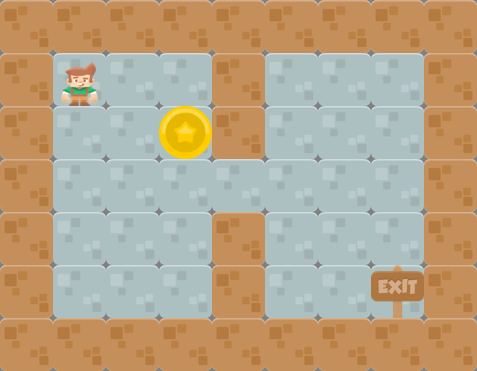

You are stuck here, forever!!!


In [439]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

agent_id = next(iter(state.agent.keys()))
for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))

if state.win:
    print("Congratulations! You have collected all cores and exited the maze!")
else:
    print("You are stuck here, forever!!!")

Now, let's solve this maze with 2 cores!

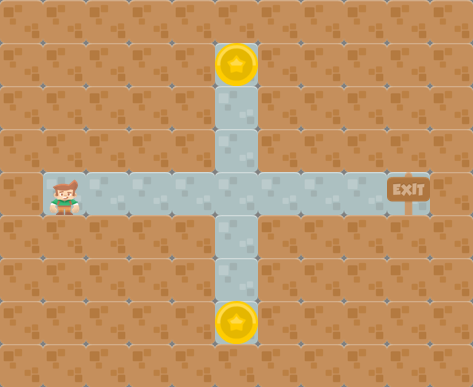

In [440]:
level = Level(
    width=11,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=default_objective_fn,    # win when collecting all cores and standing on exit
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if y == 0 or y == level.height - 1 or x == 0 or x == level.width - 1:
            level.add((x, y), create_wall())

level.add((1, 4), create_agent(health=5))
level.add((9, 4), create_exit())

level.add((5, 1), create_core())
level.add((5, 7), create_core())

for y in range(1, 8):
    for x in range(1, 10):
        if y == 4 or x == 5:
            continue

        level.add((x, y), create_wall())

# 3) Convert to runtime State (immutable)
state = to_state(level)
renderer.render(state)

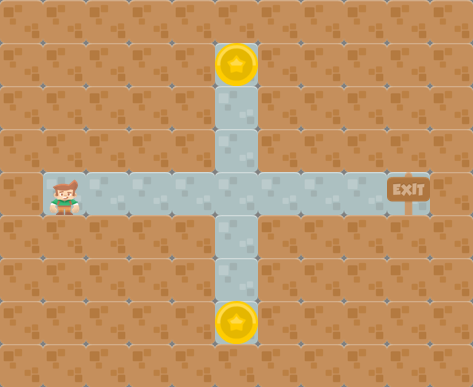

You are stuck here, forever!!!


In [441]:
# Specify the list of actions to fulfill the objective
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

agent_id = next(iter(state.agent.keys()))
for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))

if state.win:
    print("Congratulations! You have collected all cores and exited the maze!")
else:
    print("You are stuck here, forever!!!")

A small note, in case knowing the objective function is necessary for your algorithm to perform well, you can get the name of the objective function using `state.objective_fn.__name__`.

In [442]:
state.objective_fn.__name__

'default_objective_fn'

### **Level 5, 7 - Key-Door, Portals**
> More stuff you can interact with!

| Level | Focus | New Mechanic |
| --- | --- | --- |
| L0 | Basic movement | Exit |
| L1 | Maze turns | Blocking |
| L2 | Optional Coins | Collectible, Rewardable, Cost |
| L3 | One Required Core | Required |
| L4 | Two Required Cores | Required |
| L5 | Key & Door | Key, Locked |
| L7 | Portal Shortcut | Portal |

The Key-Door mechanism works the exact way it sounds: To unlock a door, you need to pick up a key (`Action.PICK_UP`). The door may or may not block the path to the exit, and trying to unlock the door may not result in a more optimal path, but it is your algorithm's job to figure that out. This introduces another new objective:

- Unlock all doors to win (independent from the exit objective and core collection objective)
- Any combination of the three objectives (`all_unlocked_objective_fn`)

To unlock a door, the agent has to be one tile next to a door in any orthogonal direction, and use the action `Action.USE_KEY`. Similar to other action, this action also incurs some cost. Attempting to perform `Action.USE_KEY` while not holding a key or not next to any door also incurs cost, so use it wisely.

The key is a `Key`, and the door is a `Locked` whose ID matches the key. You can access a locked entity using `entity.locked.key_id`. If this value is `None`, the `Locked` can be opened with any key, or is permanently locked (in the case where there may be fewer `Key`s than `Locked`s). Otherwise, only the key with a matching ID can unlock the `Locked`.

Let's try out our new mechanism:

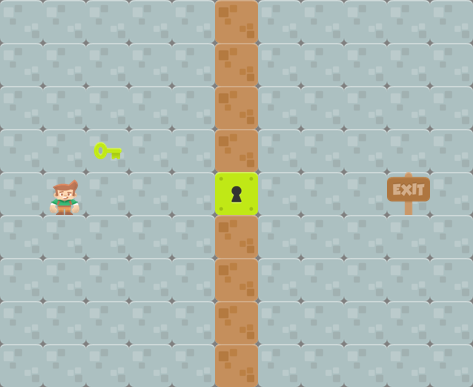

In [443]:
from grid_universe.levels.factories import create_door, create_key

level = Level(
    width=11,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if x == 5 and y != 4:
            level.add((x, y), create_wall())

level.add((1, 4), create_agent(health=5))
level.add((9, 4), create_exit())

level.add((5, 4), create_door(key_id="my_key"))
level.add((2, 3), create_key(key_id="my_key"))

# 3) Convert to runtime State (immutable)
state = to_state(level)
renderer.render(state)

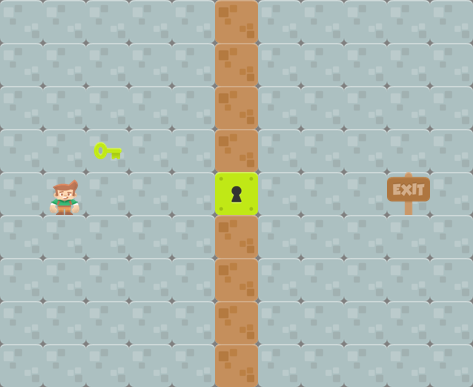

You are stuck here, forever!!!


In [444]:
# Specify the list of actions to fulfill the objective
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

agent_id = next(iter(state.agent.keys()))
for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))

if state.win:
    print("Congratulations! You have collected all cores and exited the maze!")
else:
    print("You are stuck here, forever!!!")

Next, the Portal mechanism is simpler: Whenever you step on a tile with a `Portal`, you will move to the other `Portal`. `Portal`s go in pairs, and `Portal`s belonging to the same pair have the same ID, using `entity.portal.pair_entity`. Also, if (for some reason) there is a `Blocking` and a `Portal` on the same tile, then the `Blocking` will prevent teleportation on this tile if the agent tries to approach the other `Portal`.

**NOTE**: On the map, if there are more than 1 Key-Door pair, each pair will have a different colour, and within each pair, the key and the door will have the same colour. The same logic applies to portals.

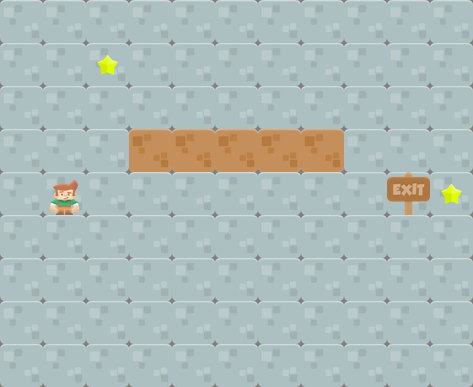

In [445]:
from grid_universe.levels.factories import create_portal

level = Level(
    width=11,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if 3 <= x <= 7 and y == 3:
            level.add((x, y), create_wall())

level.add((1, 4), create_agent(health=5))
level.add((9, 4), create_exit())

portal = create_portal()
level.add((2, 1), portal)
level.add((10, 4), create_portal(pair=portal))

# 3) Convert to runtime State (immutable)
state = to_state(level)
renderer.render(state)

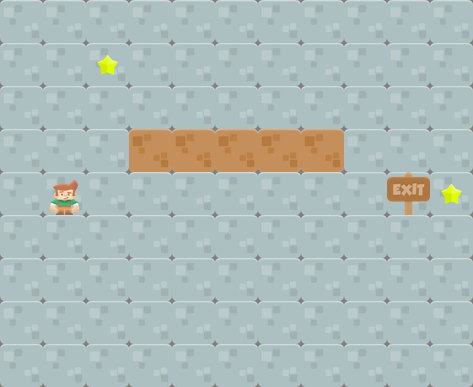

You are stuck here, forever!!!


In [446]:
# Specify the list of actions to fulfill the objective
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

# Re-initialise state so that you only need to run this cell
state = to_state(level)

agent_id = next(iter(state.agent.keys()))
for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))

if state.win:
    print("Congratulations! You have opened all doors and exited!")
else:
    print("You are stuck here, forever!!!")

### **Level 8 - Pushing Boxes**
> It's Sokoban, except there are cores in the room, some places are gatekept, and random portals teleport you to different areas..

| Level | Focus | New Mechanic |
| --- | --- | --- |
| L0 | Basic movement | Exit |
| L1 | Maze turns | Blocking |
| L2 | Optional Coins | Collectible, Rewardable, Cost |
| L3 | One Required Core | Required |
| L4 | Two Required Cores | Required |
| L5 | Key & Door | Key, Locked |
| L7 | Portal Shortcut | Portal |
| L8 | Pushing Boxes | Collidable, Moving, Pushable |

Boxes are optionally `Pushable`. There is no pushing action; whenever you move in a direction blocked by a `Pushable`, you push the `Pushable` in that direction. Boxes are also `Blocking`, so if a box is not `Pushable`, then you cannot pass through it. Also because of that, you cannot push n `Pushable` boxes at the same time, and cannot push a box against a `Blocking` entity.

Boxes may also be `Moving`, which specify entities that move in a **pre-determined** path. For this project, boxes are restricted to move exactly 1 tile maximum. All `Moving` entities have an arrow on them which specify the direction of movement in the next turn. When a `Moving` entity changes direction in its turn, it will not move, and its direction arrow changes to the new direction. 

Each `Moving` entity has the following attributes:
- `axis`: (`MovingAxis.HORIZONTAL` or `MovingAxis.VERTICAL`) Axis of travel (horizontal or vertical)
- `direction`: +1 or -1 indicating step direction along the axis.
- `bounce`: Reverse direction at edge if True; otherwise stop at boundary.
- `speed`: Tile steps attempted per turn.
- `prev_position`: Internal bookkeeping of last position (set by system).

Let's watch this box move for the first 10 turns. 

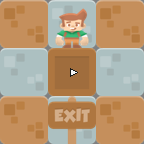

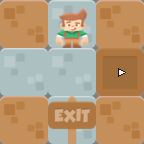

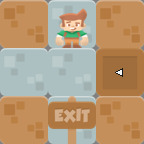

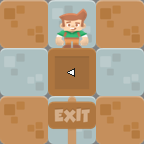

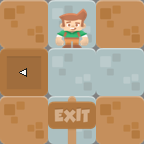

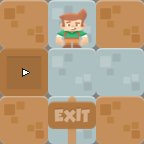

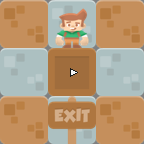

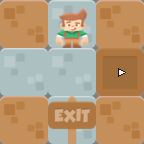

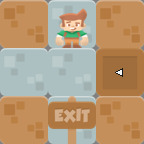

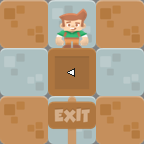

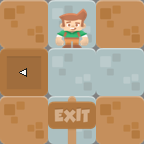

In [447]:
from grid_universe.levels.factories import create_box
from grid_universe.components.properties import MovingAxis

level = Level(3, 3, move_fn=default_move_fn, objective_fn=exit_objective_fn)
for y in range(3):
    for x in range(3):
        level.add((x, y), create_floor())

for y, x in ((0, 0), (0, 2), (2, 0), (2, 2)):
    level.add((x, y), create_wall())

level.add((1, 0), create_agent())
level.add((1, 2), create_exit())

# This box cannot be pushed and will bounce off walls. 
box = create_box(
    pushable=False,
    moving_axis=MovingAxis.HORIZONTAL, 
    moving_direction=1,
    moving_bounce=True,
    moving_speed=1
)

level.add((1, 1), box)

state = to_state(level)

renderer = TextureRenderer(resolution=144)
display(renderer.render(state))
agent_id = next(iter(state.agent.keys()))


for _ in range(10):
    state = step(state, Action.WAIT, agent_id)
    display(renderer.render(state))

renderer = TextureRenderer(resolution=480)

A box is also `Collidable`. Every entity that is `Collidable` can participate in special collision interactions. `Collidable` is not necessarily `Blocking` (which just prevents movement). For example, any `Collidable` entity, if is on top of a `Portal` (the agent stepping on a `Portal`, or the agent pushing a box on the `Portal`), then the entity will be teleported. 

Now, push this box through the portal:

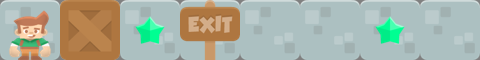

In [448]:
from grid_universe.levels.factories import create_box
from grid_universe.components.properties.moving import MovingAxis

level = Level(8, 1, move_fn=default_move_fn, objective_fn=exit_objective_fn)
for y in range(8):
    for x in range(1):
        level.add((y, x), create_floor())

portal = create_portal()

level.add((0, 0), create_agent())
level.add((1, 0), create_box())
level.add((2, 0), portal)
level.add((6, 0), create_portal(pair=portal))
level.add((3, 0), create_exit())

# This box cannot be pushed and will bounce off walls. 
box = create_box(
    pushable=False,
    moving_axis=MovingAxis.HORIZONTAL, 
    moving_direction=1,
    moving_bounce=True,
    moving_speed=1
)

state = to_state(level)

display(renderer.render(state))
agent_id = next(iter(state.agent.keys()))

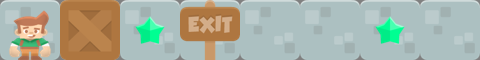

You are stuck here, forever!!!


In [449]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

agent_id = next(iter(state.agent.keys()))
for a in action_sequence:
    state = step(state, a, agent_id=agent_id)


display(renderer.render(state))
if state.win:
    print("Congratulations! You have exited the maze!")
else:
    print("You are stuck here, forever!!!")

With the introduction of boxes, we also have another objective:
- All boxes are on an exit tile (`all_pushable_at_exit_objective_fn`)
- Any combination of the known objectives

Now, navigate through this maze and play with the box mechanism. Note the objective function(s).

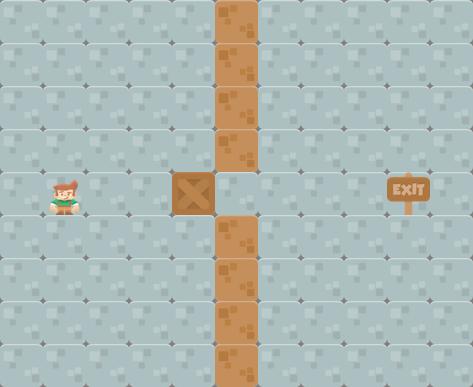

In [450]:
level = Level(
    width=11,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if x == 5 and y != 4:
            level.add((x, y), create_wall())

level.add((1, 4), create_agent(health=5))
level.add((9, 4), create_exit())
level.add((4, 4), create_box())

# 3) Convert to runtime State (immutable)
state = to_state(level)
renderer.render(state)

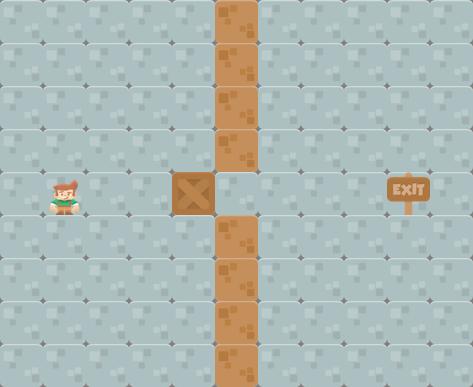

You are stuck here, forever!!!


In [451]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

agent_id = next(iter(state.agent.keys()))
for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))
if state.win:
    print("Congratulations! You have exited the maze!")
else:
    print("You are stuck here, forever!!!")

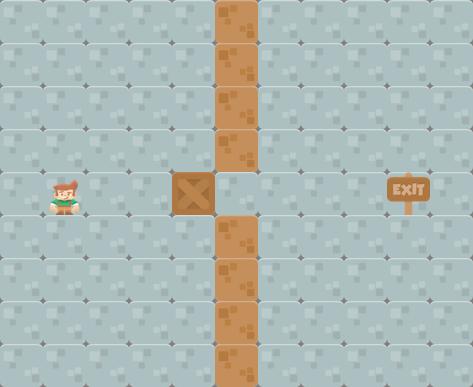

In [452]:
level = Level(
    width=11,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=all_pushable_at_exit_objective_fn,    # win when all boxes are on exits (you do not need to exit)
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if x == 5 and y != 4:
            level.add((x, y), create_wall())

level.add((1, 4), create_agent(health=5))
level.add((9, 4), create_exit())
level.add((4, 4), create_box())

# 3) Convert to runtime State (immutable)
state = to_state(level)
renderer.render(state)

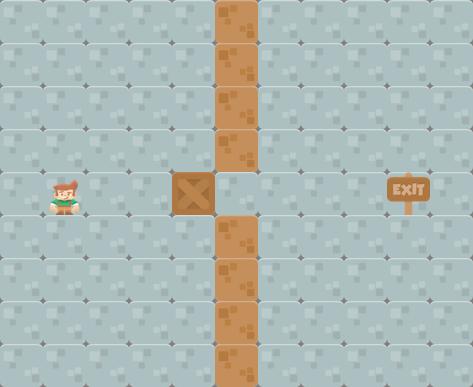

You are stuck here, forever!!!


In [453]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))
if state.win:
    print("Congratulations! You have pushed the box to the exit!")
else:
    print("You are stuck here, forever!!!")

### **Level 6, 9 - Hazard Detour, Enemy Patrol**

> Now, you may die.

| Level | Focus | New Mechanic |
| --- | --- | --- |
| L0 | Basic movement | Exit |
| L1 | Maze turns | Blocking |
| L2 | Optional Coins | Collectible, Rewardable, Cost |
| L3 | One Required Core | Required |
| L4 | Two Required Cores | Required |
| L5 | Key & Door | Key, Locked |
| L6 | Hazard Detour | Health, Damage, LethalDamage |
| L7 | Portal Shortcut | Portal |
| L8 | Pushing Boxes | Collidable, Moving, Pushable |
| L9 | Enemy Patrol | Pathfinding |

Next, we come to hazards. Generally, tiles are hazardous if they are `Damage` or `LethalDamage`. Because there is `Damage`, the agent should have some `Health` to start with!

For each turn, if an entity with `Health` is on an entity with `Damage` (the agent moves onto a lava tile, an enemy is in contact with the agent, etc.), subtract a fixed amount equal to the damage from the entity's health. 

If the entity is `LethalDamage`, the entity with `Health` will have its health set to 0. If the agent's health is 0, regardless of the objective, you lose.

The `Health` entity has two attributes:
- `health`: Current hit points. Systems should clamp this to ``[0, max_health]``.
- `max_health`: Upper bound for ``health``; may be used to normalize UI or compute proportional rewards.

By default, the agent's health will be 5. Now, try to reach the exit for these 2 cases.

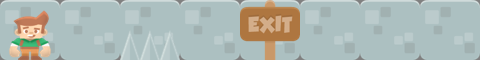

In [454]:
from grid_universe.levels.factories import create_hazard
from grid_universe.components.properties.appearance import AppearanceName

level = Level(width=8, height=1, 
    move_fn=default_move_fn, 
    objective_fn=exit_objective_fn # reach the exit to win
)

for y in range(8):
    for x in range(1):
        level.add((y, x), create_floor())

portal = create_portal()

level.add((0, 0), create_agent()) # 5 health by default
level.add((2, 0), create_hazard(appearance=AppearanceName.SPIKE, damage=2)) # the spike deals 2 damage
level.add((4, 0), create_exit())

state = to_state(level)
agent_id = next(iter(state.agent.keys()))

display(renderer.render(state))

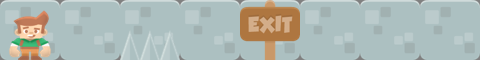

You are stuck here, forever!!!


In [455]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))
if state.win:
    print("Congratulations! You have reached the exit!")
elif state.lose:
    print("You died.")
else:
    print("You are stuck here, forever!!!")

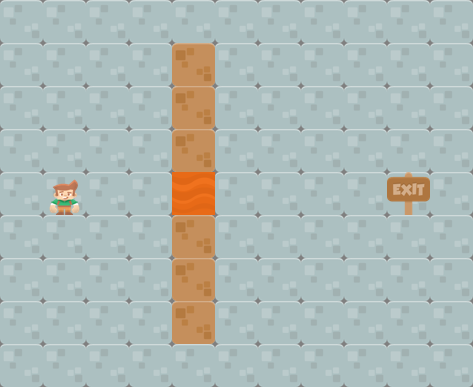

In [456]:
level = Level(
    width=11,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # reach the exit to win
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if x == 4 and y not in (0, 4, 8):
            level.add((x, y), create_wall())

level.add((1, 4), create_agent(health=5))
level.add((9, 4), create_exit())
level.add((4, 4), create_hazard(appearance=AppearanceName.LAVA, damage=2, lethal=True)) # You will die on contact with lava

# 3) Convert to runtime State (immutable)
state = to_state(level)
agent_id = next(iter(state.agent.keys()))

renderer.render(state)

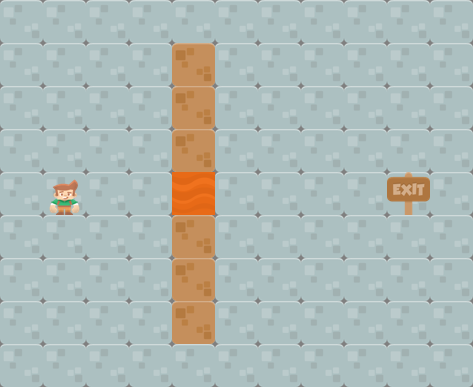

You are stuck here, forever!!!


In [457]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))
if state.win:
    print("Congratulations! You have reached the exit!")
elif state.lose:
    print("You died.")
else:
    print("You are stuck here, forever!!!")

Of course, hazards are not your only source of damage. So do enemies. Similar to hazards, enemies can be `Damage` or `LethalDamage`, and similar to boxes, enemies are also `Collidable`, meaning it can teleport and trigger other collision interactions.

There are two types of enemies you should be aware of.
- Enemies that move in pre-determined directions: They are `Moving` type. You can refer to Level 8 for more details.
- Enemies that actively search for the player: They are approaching you.

An entity with pathfinding will contain the following fields:

- `pathfind_target_ref` (`Optional["EntitySpec"]`) 
  - The optional entity ID to follow/approach. 
  - If ``None`` and ``pathfinding_type`` is ``PATH``, the system may skip pathfinding or use a default goal.
- `pathfinding_type` (`Optional[PathfindingType]`) 
  - ``PATH`` requests full pathfinding (e.g., A*)
  - ``STRAIGHT_LINE`` attempts direct movement along axis-aligned shortest displacement without obstacle search.

Let's try to escape the following two lethal patrolling enemies. 

Hint: use `Action.WAIT` if you want to wait for them to pass.

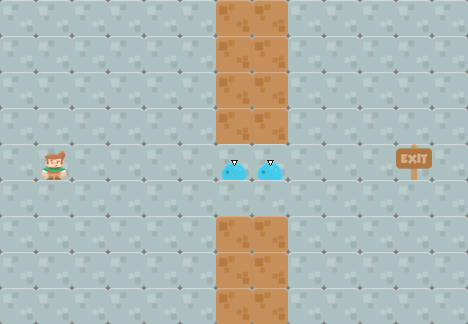

In [458]:
from grid_universe.levels.factories import create_monster

level = Level(
    width=13,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # reach the exit to win
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if x in (6, 7) and y not in (4, 5):
            level.add((x, y), create_wall())

level.add((1, 4), create_agent(health=5))
level.add((11, 4), create_exit())

level.add((6, 4), create_monster(lethal=True, moving_axis=MovingAxis.VERTICAL, moving_direction=1))
level.add((7, 4), create_monster(lethal=True, moving_axis=MovingAxis.VERTICAL, moving_direction=1))

# 3) Convert to runtime State (immutable)
state = to_state(level)
agent_id = next(iter(state.agent.keys()))

renderer.render(state)

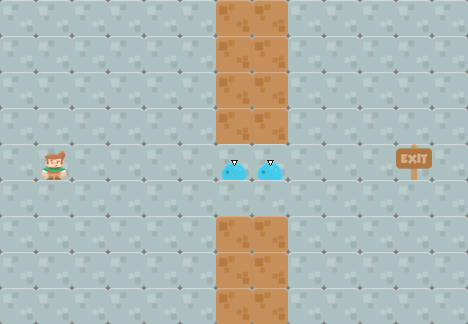

You are stuck here, forever!!!


In [459]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))
if state.win:
    print("Congratulations! You have reached the exit!")
elif state.lose:
    print("You died.")
else:
    print("You are stuck here, forever!!!")

Now, this lethal enemy will chase you using A*. Run!

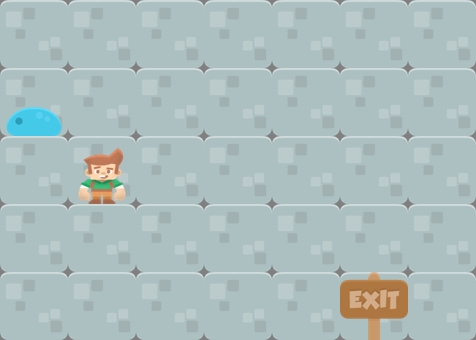

In [460]:
from grid_universe.levels.factories import create_monster
from grid_universe.components.properties.pathfinding import PathfindingType

level = Level(
    width=7,
    height=5,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # reach the exit to win
    seed=123,                          # for reproducibility
)

# 2) Layout: floors, then place objects
for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

agent = create_agent()

level.add((1, 2), agent)
level.add((5, 4), create_exit())

level.add((0, 1), create_monster(lethal=True, pathfind_target=agent, path_type=PathfindingType.PATH))

# 3) Convert to runtime State (immutable)
state = to_state(level)
agent_id = next(iter(state.agent.keys()))

renderer.render(state)

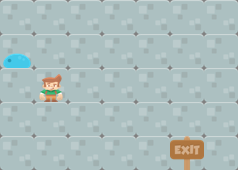

You are stuck here, forever!!!


In [461]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

renderer = TextureRenderer(resolution=240)

for a in action_sequence:
    display(renderer.render(state))
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))
if state.win:
    print("Congratulations! You have reached the exit!")
elif state.lose:
    print("You died.")
else:
    print("You are stuck here, forever!!!")

renderer = TextureRenderer(resolution=480)

### **Level 10, 11, 12 - Shield Powerup, Ghost Powerup, Boots Powerup**

> Now, you may not die.

| Level | Focus | New Mechanic |
| --- | --- | --- |
| L0 | Basic movement | Exit |
| L1 | Maze turns | Blocking |
| L2 | Optional Coins | Collectible, Rewardable, Cost |
| L3 | One Required Core | Required |
| L4 | Two Required Cores | Required |
| L5 | Key & Door | Key, Locked |
| L6 | Hazard Detour | Health, Damage, LethalDamage |
| L7 | Portal Shortcut | Portal |
| L8 | Pushing Boxes | Collidable, Moving, Pushable |
| L9 | Enemy Patrol | Pathfinding |
| L10 | Shield Powerup | Immunity, TimeLimit, UsageLimit |
| L11 | Ghost Powerup | Phasing |
| L12 | Boots Powerup | Speed |

As mentioned, the Grid is benevolent enough to not let you suffer in the maze alone, and so, it bestows on you three superpowers that may allow you escape life-or-death situations, in the form of `Collectible` (the effect is activated when you pick the `Collectible` up). Each powerup is both a `TimeLimit`, which specifies how long the effect may last (`None` means the effect will not expire), and a `UsageLimit`, which specifies how many times the effect can be used (`None` means the effect can be used an unlimited amount of times). The effect will end whenever it expires or the number of usage exceeds the limit, whichever comes first.

#### **Ghost Powerup**

A `Phasing` type. You can pass through `Blocking` entities. If there is a usage limit, one use would be consumed whenever you pass through a `Blocking` entity.

If the object is `Collidable`, this will take precedence. That is, you can still teleport, push boxes and get damaged by enemies. Note that when `Phasing` ends, it does not automatically bounce you off `Blocking` entities. If you are next to a non-`Blocking` tile, you can exit the `Blocking` entity by moving in that direction. However, if you are surrounded by `Blocking` entities in all orthogonal directions, you are stuck, forever!

Let's try the Ghost Powerup! 

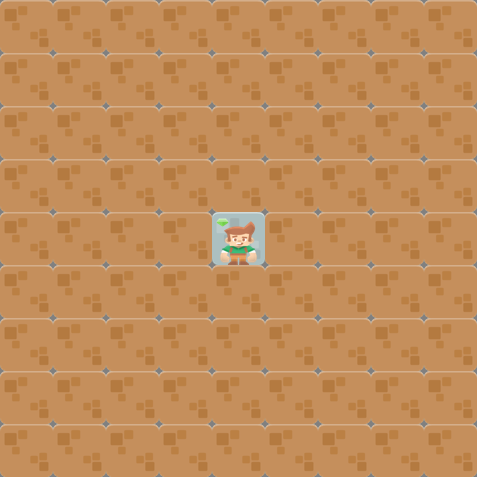

In [462]:
from grid_universe.levels.factories import create_phasing_effect, create_speed_effect, create_immunity_effect
level = Level(
    width=9,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand
    seed=123                           # for reproducibility
)

for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if (x, y) != (4, 4):
            level.add((x, y), create_wall())

level.add((4, 4), create_agent())
# For 3 turns, can walk through walls
# The phasing effect is on top of the agent, remember to pick it up!
level.add((4, 4), create_phasing_effect(time=3)) 

state = to_state(level)
agent_id = next(iter(state.agent.keys()))
renderer.render(state)

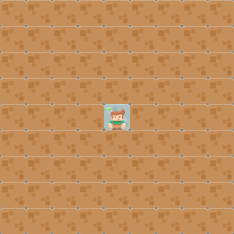

In [463]:
# Trap yourself in the wall.
action_sequence: List[Action] = [] 

renderer = TextureRenderer(resolution=240)

for a in action_sequence:
    display(renderer.render(state))
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))

renderer = TextureRenderer(resolution=480)

Now, phase to escape this maze which is separated into two partitions!

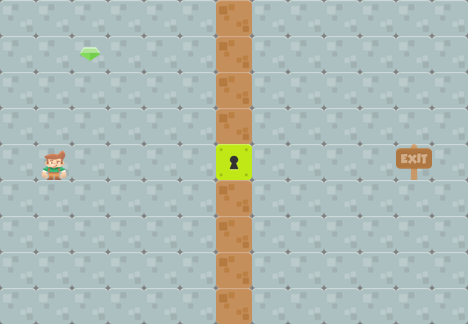

In [464]:
from grid_universe.levels.factories import create_phasing_effect, create_speed_effect, create_immunity_effect
level = Level(
    width=13,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123                           # for reproducibility
)

for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if x == 6:
            if y == 4:
                level.add((x, y), create_door(key_id="my_key"))
            else:
                level.add((x, y), create_wall())

level.add((1, 4), create_agent())
level.add((11, 4), create_exit())
level.add((2, 1), create_phasing_effect(time=3)) # For 3 turns, can walk through walls

state = to_state(level)
agent_id = next(iter(state.agent.keys()))
renderer.render(state)

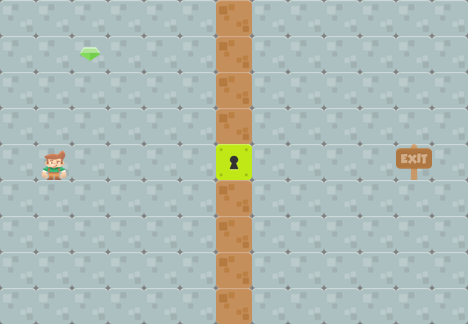

You are stuck here, forever!!!


In [465]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))
if state.win:
    print("Congratulations! You have reached the exit!")
elif state.lose:
    print("You died.")
else:
    print("You are stuck here, forever!!!")

#### **Shield Powerup**

An `Immunity` type. You will not receive damage. If there is a usage limit, if the agent would be taking damage, one use would be consumed.
Because `Immunity` works like a shield with hit count, it allows you to survive even lethal damage (which counts as a hit).

Now, let's try the Shield Power-up in this grid which is separated by a deadly lava pool.

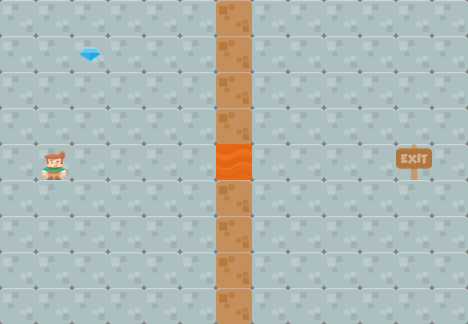

In [466]:
level = Level(
    width=13,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123                           # for reproducibility
)

for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if x == 6:
            if y == 4:
                level.add((x, y), create_hazard(appearance=AppearanceName.LAVA, damage=5, lethal=True))
            else:
                level.add((x, y), create_wall())

level.add((1, 4), create_agent())
level.add((11, 4), create_exit())
level.add((2, 1), create_immunity_effect(usage=1)) # You arre immune to damage once.

state = to_state(level)
agent_id = next(iter(state.agent.keys()))
renderer.render(state)

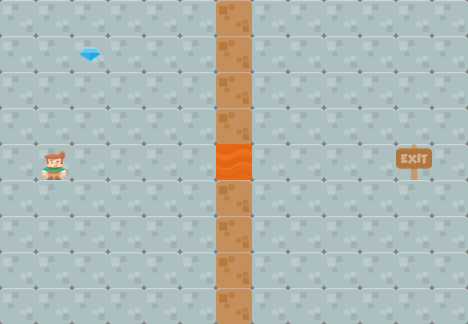

You are stuck here, forever!!!


In [467]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))
if state.win:
    print("Congratulations! You have reached the exit!")
elif state.lose:
    print("You died.")
else:
    print("You are stuck here, forever!!!")

#### **Speed Powerup**

A `Speed` type. On top of time limit and usage limit, a `Speed` also has a multiplier, which specifies how many tiles you can move per moving action. Because the multiplier is on top of the action, if the multiplier is 2, you move 2 tiles in the specified orthogonal direction (assume nothing blocks the movement), and not "1 move left, 1 move up". If there is a usage limit, every action related to moving will consume 1 use of `Speed`.

A `Speed` is particularly useful when you want to leap through damaging entities. It may buy you time from pathfinding enemies, or simply help you reach the exit faster.
Now, try to escape this grid infested with patrolling enemies!

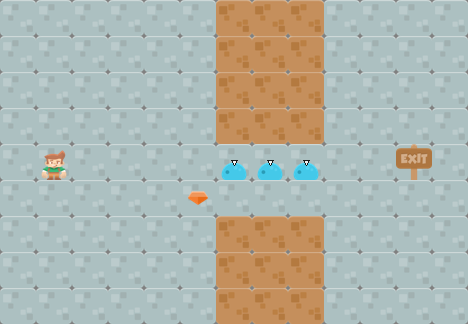

In [468]:
from grid_universe.levels.factories import create_phasing_effect, create_speed_effect, create_immunity_effect
level = Level(
    width=13,
    height=9,
    move_fn=default_move_fn,           # choose movement semantics
    objective_fn=exit_objective_fn,    # win when stand on exit
    seed=123                           # for reproducibility
)

for y in range(level.height):
    for x in range(level.width):
        level.add((x, y), create_floor())

        if 6 <= x <= 8:
            if y == 4:
                level.add((x, y), create_monster(lethal=True, moving_axis=MovingAxis.VERTICAL, moving_direction=1))
            elif y == 5:
                continue
            else:
                level.add((x, y), create_wall())

level.add((1, 4), create_agent())
level.add((11, 4), create_exit())
level.add((5, 5), create_speed_effect(multiplier=2, time=3)) # For 3 turns, can walk through walls

state = to_state(level)
agent_id = next(iter(state.agent.keys()))
renderer.render(state)

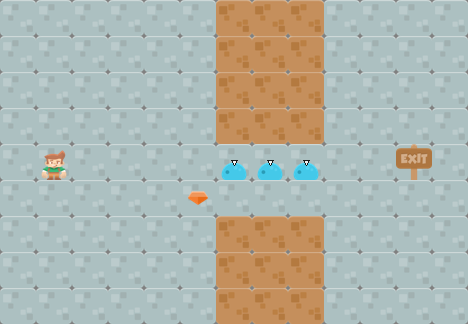

You are stuck here, forever!!!


In [469]:
action_sequence: List[Action] = [] # Fill in the sequence of actions here!

for a in action_sequence:
    state = step(state, a, agent_id=agent_id)

display(renderer.render(state))
if state.win:
    print("Congratulations! You have reached the exit!")
elif state.lose:
    print("You died.")
else:
    print("You are stuck here, forever!!!")

## **Final Note**

With that, you have mastered the Grid Universe. Enjoy gridding!